In [20]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
file = 'data.csv'

data = pd.read_csv(file)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
data.shape

(7043, 21)

# target is the churn column. 

In [25]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [26]:
data.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

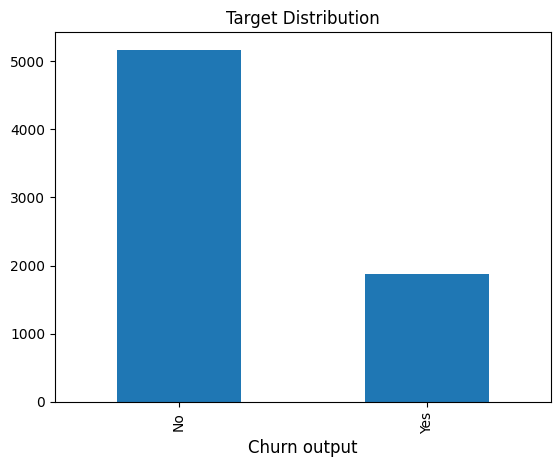

In [27]:
target_dist = data['Churn'].value_counts()
target_dist.plot(kind='bar', title='Target Distribution')
plt.xlabel('Churn output', fontsize=12)
plt.show()

## setting churn as 1 or 0 for Yes or No respectively

In [28]:
data['Churn'] = np.where(data['Churn']=='Yes',1,0)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
data.rename(columns={'customerID':'ID','gender':'Gender','SeniorCitizen':'Senior','tenure':'Tenure'},inplace=True)

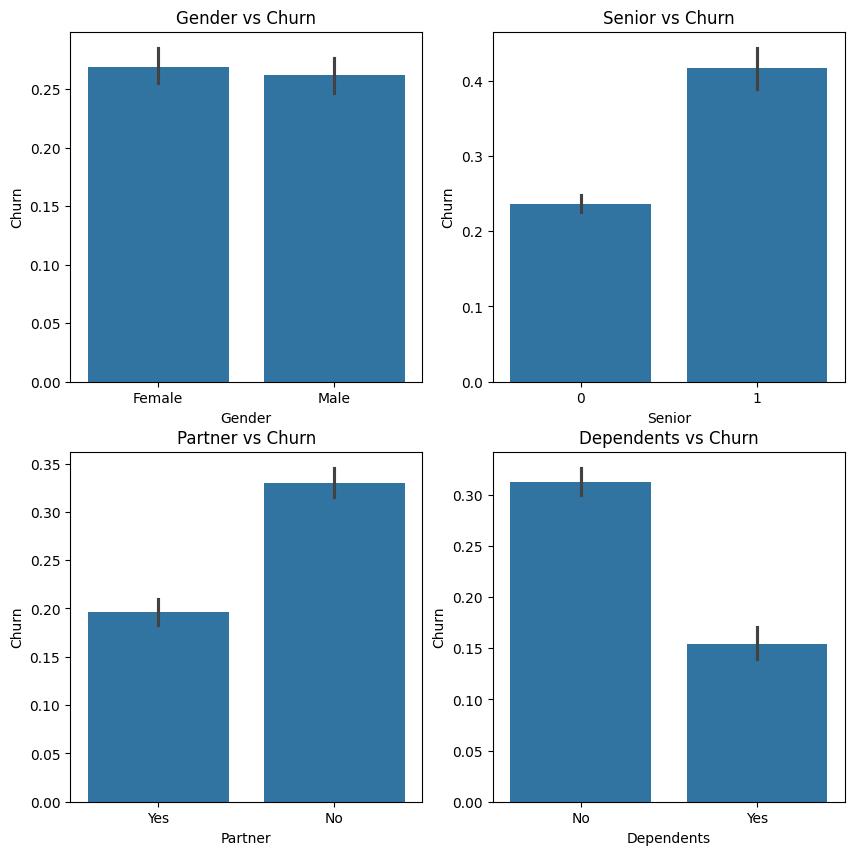

In [31]:
fig, ax = plt.subplots(2,2, figsize=(10,10))


for axes,x in zip(ax.flatten(),['Gender','Senior','Partner','Dependents']):
    sns.barplot(x=x, y='Churn',data=data,ax=axes)
    axes.set_title('{} vs Churn'.format(x))


plt.show()

Ratio of churn is not significantly different for gender.

Customers who does not have partner or dependants have a higher possibility of churning. They may be only having mobile connections and are ok to change it - attracted to better discounts,offers or better data plans.

Customers with partners and dependents doesnt prefer to change. This could be to avoid changing numbers often as this could be majorly working class.

Churn ratio is higher for senior citizens - this could be to save money, or not being internet savy.

In [32]:
data['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [33]:
data['Tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64

In [34]:
pd.DataFrame(data[['Tenure','Churn']].groupby('Churn').mean())

,Tenure
Churn,
0,37.569965
1,17.979133


In [35]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

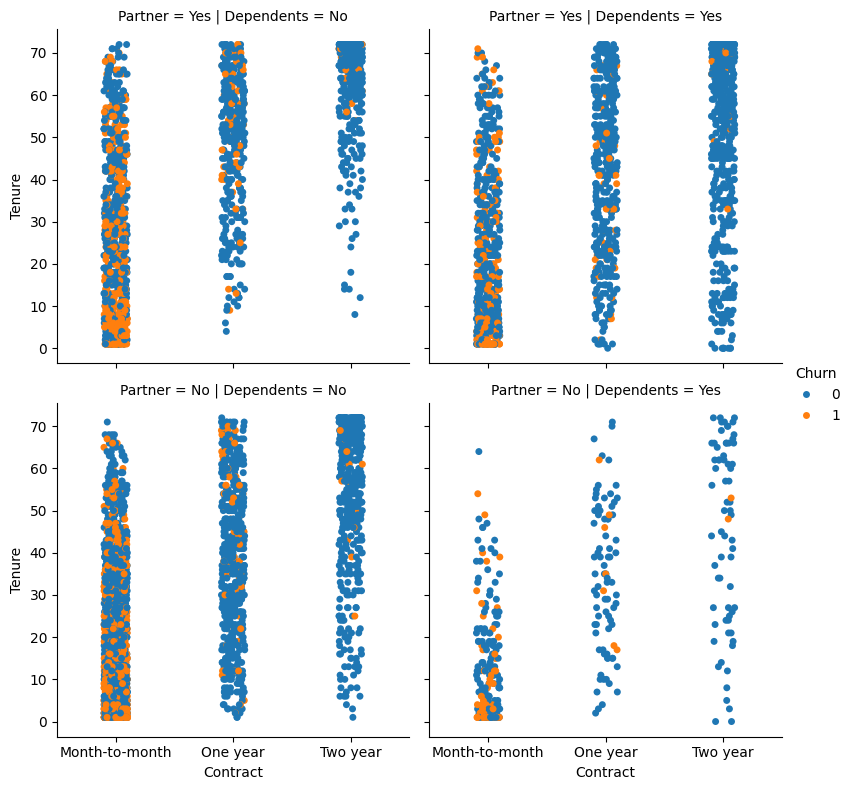

In [36]:
sns.catplot(x='Contract',y='Tenure',hue='Churn',col='Dependents',row='Partner',data=data,height=4)

The churn rate is higher for monthly contracts concentrated for less than one year tenures. These could be customers who are testing the service

Customers with Partners and Dependants are more stable in the subscription and they tend to prefer annual contracts.

<Figure size 2000x1500 with 0 Axes>

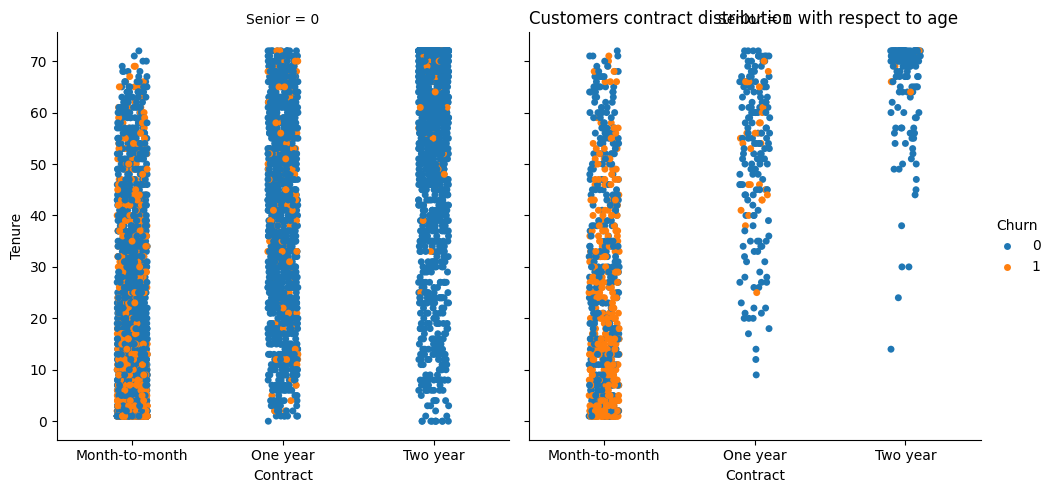

In [37]:
plt.figure(figsize=(20,15))
a = sns.catplot(x='Contract',y='Tenure',hue='Churn',data=data,col='Senior')
plt.title('Customers contract distribution with respect to age',loc='left')
plt.show()

Senior citizens doesnt prefer yearly contracts. They prefer to take monthly contracts and the churn rate is also high which explains first figure.

#Lets understand how the phone and internet service is spread among the customers. 
#what % of churned customers has no phone service, multiple lines and no lines

In [39]:
churn_df= data.query("Churn==1")

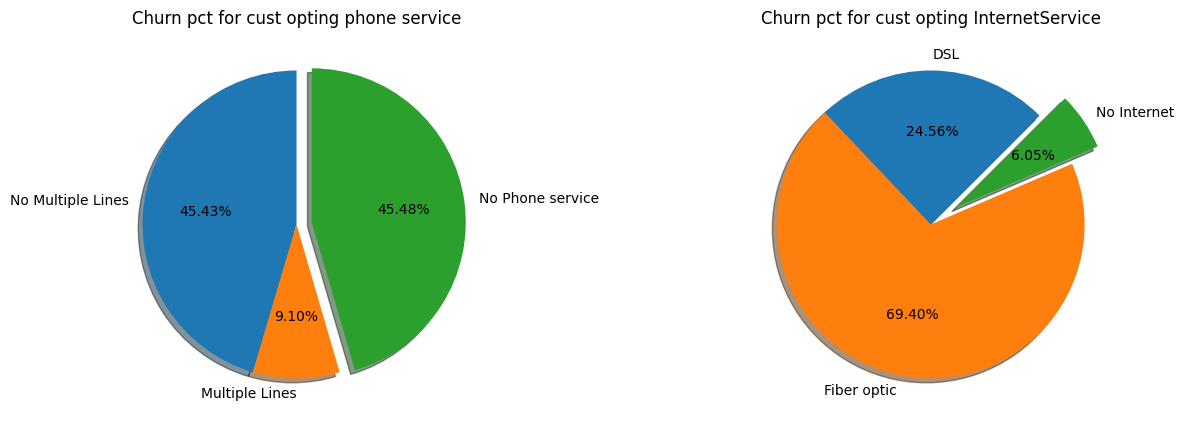

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.pie(churn_df.groupby('MultipleLines').size(),labels=['No Multiple Lines','Multiple Lines','No Phone service'],shadow=True, 
        autopct = '%1.2f%%',startangle=90,explode=(0,0,0.1))
plt.title('Churn pct for cust opting phone service')

plt.subplot(1,2,2)
plt.pie(churn_df.groupby('InternetService').size(), labels=['DSL','Fiber optic','No Internet'], shadow=True,
       autopct='%1.2f%%',startangle = 45, explode= (0,0,0.2))
plt.title('Churn pct for cust opting InternetService')
plt.show()


45% of customers churning out have a phone service available. The other 45% of customers churning out who dont have any phone service at all. These could be the customers with a monthly contract.

More than 69% of customers churning out have subscribed for a fiber optic internet service. This could be a bad service provision and definitely an area of improvement